<a href="https://colab.research.google.com/github/erosthales/predicting-customer-churn-challenge/blob/main/Desafio_TelecomX_2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Parte 2

Prevendo Cancelamento

MISS√ÉO:

Desenvolver modelos preditivos capazes de prever quais clientes t√™m maior chance de cancelar seus servi√ßos.

A empresa quer antecipar o problema da evas√£o, assim ser√° constru√≠do um pipeline robusto para essa etapa inicial de modelagem.

OBJETIVO DO DESAFIO:

Preparar os dados para a modelagem (tratamento, encoding, normaliza√ß√£o).

Realizar an√°lise de correla√ß√£o e sele√ß√£o de vari√°veis.

Treinar dois ou mais modelos de classifica√ß√£o.

Avaliar o desempenho dos modelos com m√©tricas.

Interpretar os resultados, incluindo a import√¢ncia das vari√°veis.

Criar uma conclus√£o estrat√©gica apontando os principais fatores que influenciam a evas√£o.

SER√Å TRABALHADO NESTE DESAFIO:

‚úÖ Pr√©-processamento de dados para Machine Learning

‚úÖ Constru√ß√£o e avalia√ß√£o de modelos preditivos

‚úÖ Interpreta√ß√£o dos resultados e entrega de insights

‚úÖ Comunica√ß√£o t√©cnica com foco estrat√©gico


# **EXTRA√á√ÉO**

Para iniciar an√°lise, importado os dados da[ API da Telecom X](https://drive.google.com/file/d/1Dul9YDaHCzXo8jFJKceEhzarRkjwLYnK/view). Esses dados est√£o dispon√≠veis no formato CSV e cont√™m as informa√ß√µes j√° tratadas.

In [58]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown
from IPython.display import display, HTML

In [59]:
# ID do arquivos no google Drive
file_id = '1Dul9YDaHCzXo8jFJKceEhzarRkjwLYnK'
url = f'https://drive.google.com/uc?id={file_id}'

# Baixar o Arquivo
gdown.download(url, 'dados_tratados.csv', quiet=False)

# Ler os dados
dados =pd.read_csv('dados_tratados.csv')
dados.head()

Downloading...
From: https://drive.google.com/uc?id=1Dul9YDaHCzXo8jFJKceEhzarRkjwLYnK
To: /content/dados_tratados.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.24M/1.24M [00:00<00:00, 149MB/s]


ID_Cliente Cancelamento  G√™nero  Idoso Possui_Companheiro  \
0  0002-ORFBO           No  Female      0                Yes   
1  0003-MKNFE           No    Male      0                 No   
2  0004-TLHLJ          Yes    Male      0                 No   
3  0011-IGKFF          Yes    Male      1                Yes   
4  0013-EXCHZ          Yes  Female      1                Yes   

  Possui_Dependentes  Meses_de_Contrato Telefone_Ativo Multiplas_Linhas  \
0                Yes                  9            Yes               No   
1                 No                  9            Yes              Yes   
2                 No                  4            Yes               No   
3                 No                 13            Yes               No   
4                 No                  3            Yes               No   

  Tipo_Internet  ... Suporte_Tecnico Streaming_TV Streaming_Filmes  \
0           DSL  ...             Yes          Yes               No   
1           DSL  ...              No           No              Yes   
2   Fiber optic  ...              No           No               No   
3   Fiber optic  ...              No          Yes              Yes   
4   Fiber optic  ...             Yes          Yes               No   

    Tipo_Contrato Fatura_Digital   Forma_Pagamento Valor_Mensal Valor_Total  \
0        One year            Yes      Mailed check         65.6      593.30   
1  Month-to-month             No      Mailed check         59.9      542.40   
2  Month-to-month            Yes  Electronic check         73.9      280.85   
3  Month-to-month            Yes  Electronic check         98.0     1237.85   
4  Month-to-month            Yes      Mailed check         83.9      267.40   

  tempo_estimado_meses  Conta_Diarias  
0             9.044207       2.186667  
1             9.055092       1.996667  
2             3.800406       2.463333  
3            12.631122       3.266667  
4             3.187128       2.796667  

[5 rows x 23 columns]

# PREPAR√á√ÇO DOS DADOS

Remo√ß√£o de Colunas Irrelevantes

Removendo coluna com IDs. Estimativas e valores duplicados em outras colunas. Essas colunas n√£o ajudam na previs√£o da eva~sao e podem at√© prejudicar o desempenho dos modelos.

In [60]:
# Calcular correla√ß√£o apenas entre colunas num√©ricas
dados_numericos = dados.select_dtypes(include=['number','bool'])
correlacao = dados_numericos.corr().abs()

# Pegar pares com alta correla√ß√£o
pare_correlacionados = [
    (coluna1,coluna2)
    for coluna1 in correlacao.columns
    for coluna2 in correlacao.columns
    if coluna1 != coluna2 and correlacao.loc[coluna1,coluna2] >= 0.95
]

print("Pares de colunas com alta correla√ß√£o:")
print('-'*41)
for coluna1, coluna2 in pare_correlacionados:
    print(f"{coluna1} <-> {coluna2}")


Pares de colunas com alta correla√ß√£o:
-----------------------------------------
Meses_de_Contrato <-> tempo_estimado_meses
Valor_Mensal <-> Conta_Diarias
tempo_estimado_meses <-> Meses_de_Contrato
Conta_Diarias <-> Valor_Mensal


In [61]:
# Remover as colunas com alta correla√ß√£o
dados = dados.drop(['ID_Cliente', 'tempo_estimado_meses','Conta_Diarias','Valor_Total'], axis=1)

#Remover registros onde o valor √© n√£o informado
dados = dados[dados['Cancelamento'] != 'N√£o informado']

dados.head()

Cancelamento  G√™nero  Idoso Possui_Companheiro Possui_Dependentes  \
0           No  Female      0                Yes                Yes   
1           No    Male      0                 No                 No   
2          Yes    Male      0                 No                 No   
3          Yes    Male      1                Yes                 No   
4          Yes  Female      1                Yes                 No   

   Meses_de_Contrato Telefone_Ativo Multiplas_Linhas Tipo_Internet  \
0                  9            Yes               No           DSL   
1                  9            Yes              Yes           DSL   
2                  4            Yes               No   Fiber optic   
3                 13            Yes               No   Fiber optic   
4                  3            Yes               No   Fiber optic   

  Seguranca_Online Backup_Online Protecao_Dispositivo Suporte_Tecnico  \
0               No           Yes                   No             Yes   
1               No            No                   No              No   
2               No            No                  Yes              No   
3               No           Yes                  Yes              No   
4               No            No                   No             Yes   

  Streaming_TV Streaming_Filmes   Tipo_Contrato Fatura_Digital  \
0          Yes               No        One year            Yes   
1           No              Yes  Month-to-month             No   
2           No               No  Month-to-month            Yes   
3          Yes              Yes  Month-to-month            Yes   
4          Yes               No  Month-to-month            Yes   

    Forma_Pagamento  Valor_Mensal  
0      Mailed check          65.6  
1      Mailed check          59.9  
2  Electronic check          73.9  
3  Electronic check          98.0  
4      Mailed check          83.9

# Encoding

Inicialmente foi idenficado os valores √∫nicos de cada coluna e posteriormente trasformado as vari√°veis cetg√≥ricas em foramto n√∫merico para torn√°-las compat√≠veis com algoritmos de ML. utilizou - se um m√©todo de codifica√ß√£o adequado como o **one-hot encoding**

In [62]:
# Para saber os valores √∫nicos por colunas e quantidade

for col in dados.select_dtypes(include='object').columns:
  titulo = f' --> {col.upper()}'
  display(HTML(titulo))
  display(dados[col].value_counts(dropna=False).head(3).to_frame(name='Frequ√™ncia'))
  print('-'*35)

Frequ√™ncia
Cancelamento            
No                  5163
Yes                 1869

-----------------------------------


Frequ√™ncia
G√™nero            
Male          3549
Female        3483

-----------------------------------


Frequ√™ncia
Possui_Companheiro            
No                        3639
Yes                       3393

-----------------------------------


Frequ√™ncia
Possui_Dependentes            
No                        4933
Yes                       2099

-----------------------------------


Frequ√™ncia
Telefone_Ativo            
Yes                   6352
No                     680

-----------------------------------


Frequ√™ncia
Multiplas_Linhas            
No                      3385
Yes                     2967
No phone service         680

-----------------------------------


Frequ√™ncia
Tipo_Internet            
Fiber optic          3096
DSL                  2416
No                   1520

-----------------------------------


Frequ√™ncia
Seguranca_Online               
No                         3497
Yes                        2015
No internet service        1520

-----------------------------------


Frequ√™ncia
Backup_Online                  
No                         3087
Yes                        2425
No internet service        1520

-----------------------------------


Frequ√™ncia
Protecao_Dispositivo            
No                          3094
Yes                         2418
No internet service         1520

-----------------------------------


Frequ√™ncia
Suporte_Tecnico                
No                         3472
Yes                        2040
No internet service        1520

-----------------------------------


Frequ√™ncia
Streaming_TV                   
No                         2809
Yes                        2703
No internet service        1520

-----------------------------------


Frequ√™ncia
Streaming_Filmes               
No                         2781
Yes                        2731
No internet service        1520

-----------------------------------


Frequ√™ncia
Tipo_Contrato             
Month-to-month        3875
Two year              1685
One year              1472

-----------------------------------


Frequ√™ncia
Fatura_Digital            
Yes                   4168
No                    2864

-----------------------------------


Frequ√™ncia
Forma_Pagamento                      
Electronic check                 2365
Mailed check                     1604
Bank transfer (automatic)        1542

-----------------------------------


In [63]:
# Primeiro Passo: Mapear os valores para Bin√°rio
import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore", category=FutureWarning)
  dados = dados.replace({'Yes': 1, 'No': 0})
  dados = dados.replace({'Female': 1, 'Male': 0})
  dados = dados.replace({'True': 1, 'False': 0})

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   int64  
 1   G√™nero                7032 non-null   int64  
 2   Idoso                 7032 non-null   int64  
 3   Possui_Companheiro    7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         703

In [64]:
# Segundo Passo: Identificar colunas que t√™m s√≥ 0 e 1
binarios = [col for col in dados.columns if set(dados[col].dropna().unique()).issubset({0, 1})]

#terceiro passo: Converter essas colunas para booleano
dados[binarios] = dados[binarios].astype(bool)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancelamento          7032 non-null   bool   
 1   G√™nero                7032 non-null   bool   
 2   Idoso                 7032 non-null   bool   
 3   Possui_Companheiro    7032 non-null   bool   
 4   Possui_Dependentes    7032 non-null   bool   
 5   Meses_de_Contrato     7032 non-null   int64  
 6   Telefone_Ativo        7032 non-null   bool   
 7   Multiplas_Linhas      7032 non-null   object 
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   object 
 10  Backup_Online         7032 non-null   object 
 11  Protecao_Dispositivo  7032 non-null   object 
 12  Suporte_Tecnico       7032 non-null   object 
 13  Streaming_TV          7032 non-null   object 
 14  Streaming_Filmes      7032 non-null   object 
 15  Tipo_Contrato         703

In [65]:
# Quarto Passo: One-hot encoding para todas as colunas cat√©goricas multiclasse
dados = pd.get_dummies(dados, drop_first=True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancelamento                              7032 non-null   bool   
 1   G√™nero                                    7032 non-null   bool   
 2   Idoso                                     7032 non-null   bool   
 3   Possui_Companheiro                        7032 non-null   bool   
 4   Possui_Dependentes                        7032 non-null   bool   
 5   Meses_de_Contrato                         7032 non-null   int64  
 6   Telefone_Ativo                            7032 non-null   bool   
 7   Fatura_Digital                            7032 non-null   bool   
 8   Valor_Mensal                              7032 non-null   float64
 9   Multiplas_Linhas_1                        7032 non-null   bool   
 10  Multiplas_Linhas_No phone service       

In [66]:
# Quinto Passo: Calcular novamente a correla√ß√£o apenas entre colunas n√∫mericas
dados_numericos = dados.select_dtypes(include=['number','bool'])
correlacao = dados_numericos.corr().abs()

# Pegar pares com alta correla√ß√£o
pare_correlacionados = [
    (coluna1,coluna2)
    for coluna1 in correlacao.columns
    for coluna2 in correlacao.columns
    if coluna1 != coluna2 and correlacao.loc[coluna1,coluna2] >= 0.95
]

print("Pares de colunas com alta correla√ß√£o:")
print('-'*40)
for coluna1, coluna2 in pare_correlacionados:
    print(f"{coluna1} <-> {coluna2}")

Pares de colunas com alta correla√ß√£o:
----------------------------------------
Telefone_Ativo <-> Multiplas_Linhas_No phone service
Multiplas_Linhas_No phone service <-> Telefone_Ativo
Seguranca_Online_No internet service <-> Backup_Online_No internet service
Seguranca_Online_No internet service <-> Protecao_Dispositivo_No internet service
Seguranca_Online_No internet service <-> Suporte_Tecnico_No internet service
Seguranca_Online_No internet service <-> Streaming_TV_No internet service
Seguranca_Online_No internet service <-> Streaming_Filmes_No internet service
Backup_Online_No internet service <-> Seguranca_Online_No internet service
Backup_Online_No internet service <-> Protecao_Dispositivo_No internet service
Backup_Online_No internet service <-> Suporte_Tecnico_No internet service
Backup_Online_No internet service <-> Streaming_TV_No internet service
Backup_Online_No internet service <-> Streaming_Filmes_No internet service
Protecao_Dispositivo_No internet service <-> Seguranc

In [67]:
# Sexto Passo: Remover colunas com alta correla√ß√£o:
dados = dados.drop(['Multiplas_Linhas_No phone service',
    'Backup_Online_No internet service',
    'Protecao_Dispositivo_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'], axis =1)

# Remover refistros onde o valor √© 'N√£o informado'
dados = dados[dados['Cancelamento'] != 'N√£o informado']

dados.head()

Cancelamento  G√™nero  Idoso  Possui_Companheiro  Possui_Dependentes  \
0         False    True  False                True                True   
1         False   False  False               False               False   
2          True   False  False               False               False   
3          True   False   True                True               False   
4          True    True   True                True               False   

   Meses_de_Contrato  Telefone_Ativo  Fatura_Digital  Valor_Mensal  \
0                  9            True            True          65.6   
1                  9            True           False          59.9   
2                  4            True            True          73.9   
3                 13            True            True          98.0   
4                  3            True            True          83.9   

   Multiplas_Linhas_1  ...  Backup_Online_1  Protecao_Dispositivo_1  \
0               False  ...             True                   False   
1                True  ...            False                   False   
2               False  ...            False                    True   
3               False  ...             True                    True   
4               False  ...            False                   False   

   Suporte_Tecnico_1  Streaming_TV_1  Streaming_Filmes_1  \
0               True            True               False   
1              False           False                True   
2              False           False               False   
3              False            True                True   
4               True            True               False   

   Tipo_Contrato_One year  Tipo_Contrato_Two year  \
0                    True                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Forma_Pagamento_Credit card (automatic)  Forma_Pagamento_Electronic check  \
0                                    False                             False   
1                                    False                             False   
2                                    False                              True   
3                                    False                              True   
4                                    False                             False   

   Forma_Pagamento_Mailed check  
0                          True  
1                          True  
2                         False  
3                         False  
4                          True  

[5 rows x 24 columns]

# Verifica√ß√£o da Propor√ß√£o de Evas√£o

Calculamos a propor√ß√£o de clientes cancelados (evadidos) e os que permaneceram. A distribui√ß√£o ser√° usada para definir se o dataset est√° balanceado.

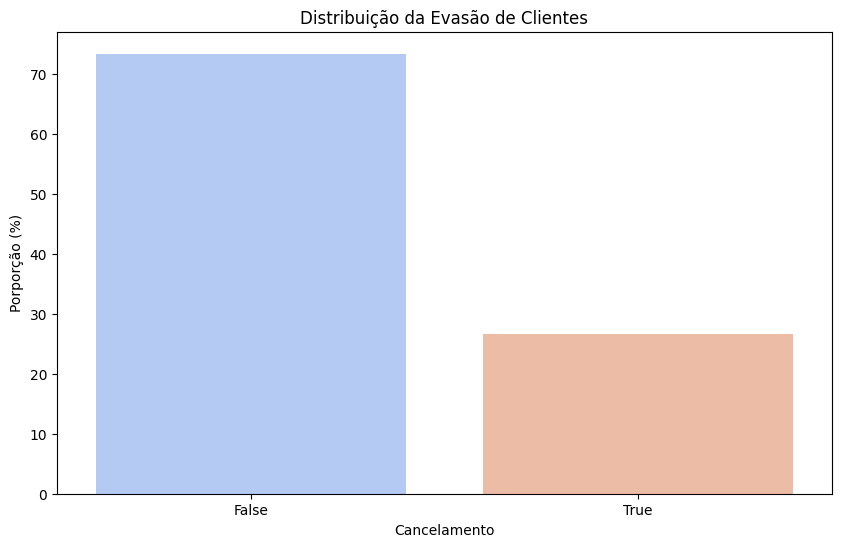


 Frequ√™ncia Absoluta:
-----------------------
Cancelamento
False    5163
True     1869
Name: count, dtype: int64
-

 Propro√ß√£o (%)
-----------------
Cancelamento
False    73.421502
True     26.578498
Name: proportion, dtype: float64
-



In [68]:
# Frequ√™ncia absoluta e raltiva da coluna Cancelamento
frequencia = dados['Cancelamento'].value_counts()
proporcao = dados['Cancelamento'].value_counts(normalize=True) * 100

# Visualizar com grafico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=proporcao.index, y=proporcao.values, hue=proporcao.index, palette='coolwarm', legend=False)
plt.ylabel('Porpor√ß√£o (%)')
plt.title('Distribui√ß√£o da Evas√£o de Clientes')
plt.show()

#Exibir os resultados
print('\n Frequ√™ncia Absoluta:')
print('-' * 23)
print(frequencia)
print('-\n' * 1)
print( ' Propro√ß√£o (%)')
print('-' * 17)
print(proporcao)
print("-\n")

 - Equilibrio: Quandas as Clesses est√£o pr√≥ximas de 50% / 50%.

 - Gerenci√°vel quando proximo de 70% / 30% - Se 7-% dos clientes permaneceram e 3-% cancelaram, ainda √© possivel treinar bons modelos com t√©cnicas de balancieamento

 - Desequilibrio Forte: Quando uma clesse tem 80% ou mais dos registros, o modelo pode ignorar a classe minotit√°ria, e ser√° importante:

1.        Aplicar t√©cincas de balanciamento ( como oversampling com Smote, undersampling, etc)
2.        Escolher m√©tricas apropridas ( como F1-score, recall, AUC) e n√£o apenas acur√°cia.


*   Item de lista



# Balanceamento de Classes

Para aprofundar a an√°lise, foi aplicado t√©cnicas de balanceamento como undersampling, oversampling e SMOTE. Em situa√ß√µes de forte desbalanceamento, ferramentas como SMOTE podem ser √∫teis para garar exemplos sint√©ticos da classe minotit√°ria.

In [69]:
# Separar features() e Target()
X = dados.drop('Cancelamento', axis=1)
y = dados['Cancelamento']

In [70]:
# Oversampling com RandomOverSampler (Duplicar segistros da Classe minot√°ria)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("Distribui√ß√£o Ap√≥s Oversampling:")
print('-'*31)
print(pd.Series(y_res).value_counts())

Distribui√ß√£o Ap√≥s Oversampling:
-------------------------------
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


In [71]:
# Undersampling com RandomUnderSampler (Remover registros da Classe majort√°ria)
#Gerar novas amostras sint√©ticas da classe minorit√°ria, em vez de apenas copiar

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Distribui√ß√£o Ap√≥s Undersampling:")
print('-'*32)
print(pd.Series(y_res).value_counts())


Distribui√ß√£o Ap√≥s Undersampling:
--------------------------------
Cancelamento
False    1869
True     1869
Name: count, dtype: int64


In [72]:
# SMOTE (Synthetic Monorty Over-sampling Techique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribui√ß√£o Ap√≥s SMOTE:")
print('-'*30)
print(pd.Series(y_res).value_counts())

Distribui√ß√£o Ap√≥s SMOTE:
------------------------------
Cancelamento
False    5163
True     5163
Name: count, dtype: int64


# Balanceamento de Classes

antes da Cria√ß√£o dos modelos, foi analisada a propor√ß√£o entre as classes das vari√°vel-alvo **Cancelamento**, que indica se o cliente EVADIU(1) ou PERMANECEU (0). Identificou-se um desequilibrio entre as classes, o que poderia comprometer o desempenho preditivo dos algoritmos, especialmente em rela√ß√£o √† detecc√ß√£o de clientes propensos √† evas√£o.
Para lidar com esse problema, foram testadas tr√™s t√©cnicas de balanceamento:

Oversampling com RandomOverSampler: Aumenta a quantidade da classe minorit√°ria replicando seus exemplos.
Undersampling com RandomUnderSampler: Reduz a quantidade da classe majorit√°ria removendo exemplos.
SMOTE (Synthetic Minority Over-sampling Technique): Gera exemplos sint√©ticos da classe minorit√°ria com base nos vizinhos mais pr√≥ximos.
Ap√≥s a compara√ß√£o das distribui√ß√µes, optou-se por seguir com a t√©cnica SMOTE, pois ela mant√©m todos os dados originais e cria novos registros de forma artificial, evitando duplica√ß√µes e reduzindo o risco de overfitting.

Os dados balanceados foram ent√£o utilizados para treinar e avaliar os modelos preditivos. O desempenho foi posteriormente analisado por meio de m√©tricas como precis√£o, recall, f1-score e matriz de confus√£o, que ser√£o apresentados nas pr√≥ximas etapas.

# Normaliza√ß√£o ou Padroniz√ß√£o (se necess√°rio)

Foi avaliado a necessidade de normalizar ou padronizar os dados conforme os modelos que ser√£o aplicados. Modelos baseados em dest√¢ncias, como KNN, SVM, Regress√£o Log√≠stica e Redes Neurais, querem esses pr√©-processamento. J√° modelos baseados em √†rvores, como Decision Tree, Random Forest e XGBoost, n√£o s√£o sens√≠veis √† escalas dos dados.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separar X e Y
X = dados.drop(columns=['Cancelamento'])
y = dados['Cancelamento']

# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Identificar colunas n√∫mericas para padronizar
colunas_numericas = ['Meses_de_Contrato', 'Valor_Mensal']

# Criar c√≥pias para n√£o modeificar original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Aplicar StandardScaler s√≥ nas colunas num√©ricas
scaler = StandardScaler()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Agora se pode usar X_train_Scales e X_test_scaled para treina modelos sensiveis √† escala

# Normaliza√ß√£o - Padroniza√ß√£o dos Dados

Como parte do pr√©-processamento, foi aplicado a padroniza√ß√£o dos atributos num√©ricos, utilizando a t√©cnicas STANDARDSCALER, que transforma os dados para que tenha m√©dia zero e desvio padr√£o um.

Esse pano √© fundamental para o bom desempenho de algoritmos que s√£o sens√≠veis √† escalas dos dados, como:

* KNN (K-Nearest Neighbors)
* SVM (Support Vector Machines)
* Regress√£o Log√≠stica
* Redes Neurais

A padroniza√ß√£o foi aplicada apenas ap√≥s o balaceamento das clesses e a separa√ß√£o entre dados de treino e teste, para evitar vazamento de dados e garantir que as transforma√ß√µes ocorram apenas com base nos dados de treino. Com isso, garantimos uma compara√ß√£o justa e v√°lida durante a avalia√ß√£o dos modelos.







# Correla√ß√£o e Sele√ß√£o de Variaveis


Analise de Correl√ß√£o

A Matriz de correla√ß√£o √© √∫til para identificar rela√ß√µes entre vari√°veis num√©ricas. Observe especialmente quais var√°veis apresentam maior correla√ß√£o com a evas√£o, pois elas podem ser fortes candidatas para o modelo preditivo.

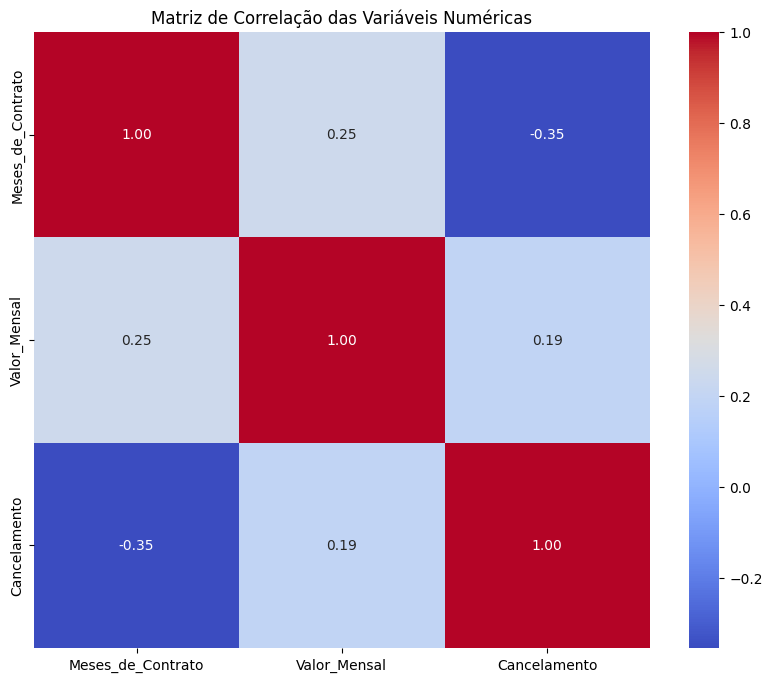

In [74]:
# identificar as colunas num√©ricas automaticamente
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Para garantir que a coluna alvo 'Cancelamento" esteja incluida
if 'Cancelamento' not in colunas_numericas:
  colunas_numericas.append('Cancelamento')

# Criar um DataFrame apenas com as colunas n√∫mericas
dados_numericos = dados[colunas_numericas]

# Calcular matriz de correla√ß√£o
corr = dados_numericos.corr()

# Vizualizar matriz de correla√ß√£o
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',square=True)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()

# Analisar corretal√ßao com evas√£o
corr_com_evas√£o = corr['Cancelamento'].drop('Cancelamento').sort_values(ascending=False)

# An√°lise de Correla√ß√£o

Foi utilizada a matriz de correla√ß√£o para identificar poss√≠vel rela√ß√µes entre as vari√°veis n√∫mericas e a vari√°vel-alvo CANCELAMENTO. A an√°lise permite identificar vari√°veis que apresentam maior influ√™ncia na evas√£o dos clientes.

A Matriz de correla√ß√£o retornou as vari√°veis MESES_DE_CONTRATO e VALOR_MENSAL, pois s√£o as √∫nicas vari√°veis n√∫m√©ricas cont√≠nuas do conjuntos de dados. As demais vari√°veis s√£o majoritariamente vin√°rias (indicadores) o que limita sua visualiza√ß√£o na matriz padr√£o.

Para Complementar, foi plotado um grafico com vari√°veis mais correlacionadas com CANCELAMENTO, com objetivo de enriquecer a an√°lise e edentificar fatores releventes para a eva√ß√£o:

* A Correla√ß√£o entre MESES_DE_CONTRATO e VALOR_MENSAL √© fraco (0.25)
* A Correla√ß√£o entre MESES_DE_CONTRATO e CANCELAMENTO √© fraco (0.35)
* A Correla√ß√£o entre VALOR_MENSAL e CANCELAMENTO √© fraco (0.19)

Obs: Isso sugere que n√£o h√° uma rela√ß√£o linear forte entre o tempo de contrato e o valor pago mensalmente, e entre cada uma das vart√°veis com o cancelamento.

# An√°lise Direiconadas

Nesta etapa, analisamos como duas vari√°veis principais ‚Äî Meses de Contrato e Valor Mensal ‚Äî se comportam em rela√ß√£o ao Cancelamento (Evas√£o) dos clientes.

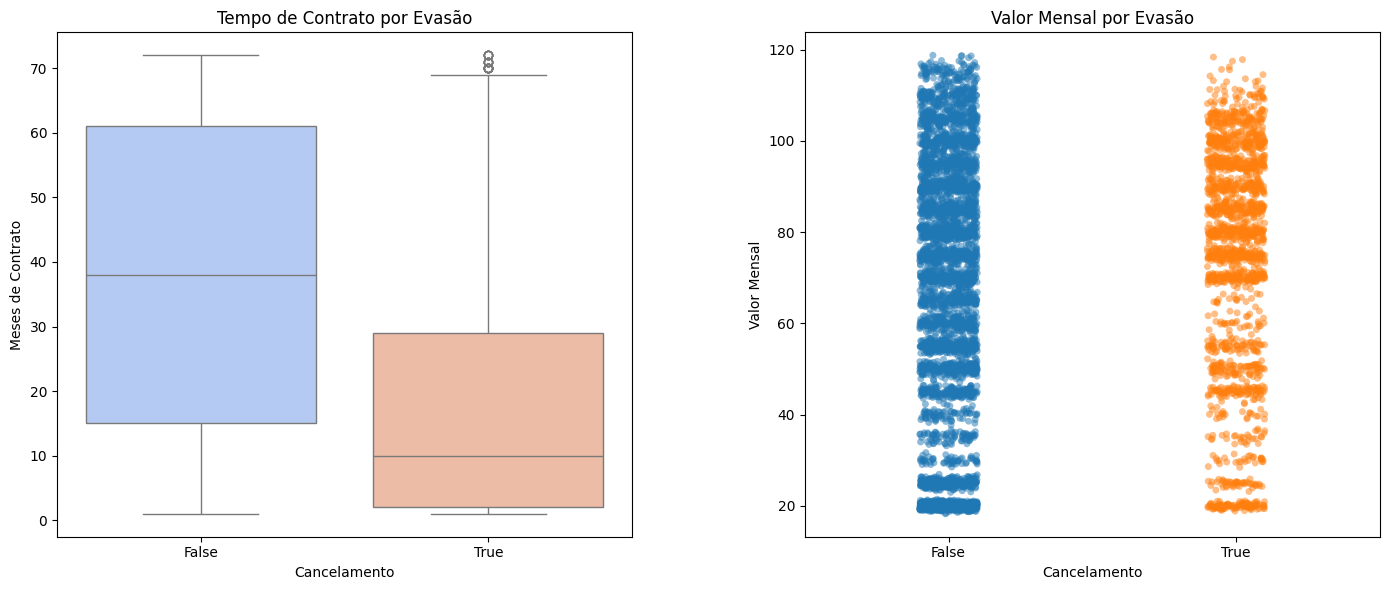

In [75]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Boxplot com hue e legend=False para evitar warning
sns.boxplot(ax=axes[0], x='Cancelamento', y='Meses_de_Contrato', hue='Cancelamento', palette='coolwarm', data=dados, legend=False)
axes[0].set_title('Tempo de Contrato por Evas√£o',fontsize=12)
axes[0].set_ylabel('Meses de Contrato')

sns.stripplot(ax=axes[1], x='Cancelamento', y='Valor_Mensal', hue='Cancelamento',jitter=True, alpha=0.5, data=dados, legend=False)
axes[1].set_title('Valor Mensal por Evas√£o', fontsize=12)
axes[1].set_ylabel('Valor Mensal')

plt.tight_layout()

# Aumenta o espa√ßo horizontal entre os gr√°ficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# An√°lise Direcionada

Grafico 1: Boxplot - Tempo de Contrato por Evas√£o

O boxplot apresenta a distribui√ß√£o dos meses de contrato para clientes que permaneceram(0) e os que evadiram(1).

* A mediana (linha central da caixa) mostra a tend√™ncia central de cada grupo.
* As caixas representam o intervalo interquartil (50% central dos dados).
* Pontos fora da caiza (outliers) indicam clientes com tempos de contrato muito diferentes da maioria.


Interpreta√ß√£o:
  Podemos abservar que clientes que evadiram tendem a ter um **tempo de contrato Menor** do que os que permaneceram. Isso pode indicar que a evas√£o ocorre mais frequentemente nos primeiros meses de contrato.

----------------------------------------

# Gr√°fico 2: Stripplot - Valor Mensal por Evas√£o

O Stripplot (Tamb√©m chamado de scatter plot categ√≥rico) mostra cada cliente individualmente, posicionando seus valores mensais em rela√ß√£o √† evas√£o.

* Cada ponto representa um cliente
* Os pontos est√£o "es√°lhados" horizontalmente (via jitter) para facilitar a visualiza√ß√£o da densidade.

Interpreta√ß√£o:
  Apesar de haver sobreposi√ß√£o, √© possivel notar uma **concentra√ß√£o maior de valores mensais mais altos entre os clientes que evadiram(1)**, sugerindo que valores mais **elevados podem estar relacionados √† evas√£o**

----------------------------------------

Esses dois gr√°ficos ajudam a entender melhor **quais fatores est√£o associados √† decis√£o dos clientes em cancelar os servi√ßos**.

# Modelagem Preventiva

Separa√ß√£o de Dados

  Uma divis√£o comum √© 70% para treino e 30% para teste, ou 80/20,dependendo do tamanho da base de dados.

In [76]:
# Dividir treino e teste (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y)

# Cria√ß√£o de Modelos

Foi criado 4 modelos diferentes para prever a evas√£o de clientes:

* Regress√£o Log√≠stica e KNN que exige normaliza√ß√£o.

* √Årvore de Decis√£o e Random Forest que n√£o exige normaliza√ß√£o.

In [77]:
# MODELO 1: Regress√£o Log√≠stica (com normaliza√ß√£o)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Normaliza√ß√£o apenas para o modelo 1
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# treinar modelo com dados normalizados
modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred_log = modelo_log.predict(X_test_norm)

# Avalia√ß√£o
print("Regress√£o Log√≠stica")
print("-"*23)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Regress√£o Log√≠stica
-----------------------
[[752 281]
 [ 82 292]]
              precision    recall  f1-score   support

       False       0.90      0.73      0.81      1033
        True       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.74      0.76      1407



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [78]:
# MODELO 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Treinar modelo
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previs√µes
y_pred_rf = modelo_rf.predict(X_test)

# Avalia√ß√£o
print("Random Forest")
print("-"*23)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
-----------------------
[[936  97]
 [199 175]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [79]:
# MODELO 3: KNN - K vizinhos mais pr√≥ximos (com normaliza√ß√£o)
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_norm, y_train)
y_pred_knn = modelo_knn.predict(X_test_norm)

# Avalia√ß√£o
print("KNN")
print("-"*11)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN
-----------
[[880 153]
 [189 185]]
              precision    recall  f1-score   support

       False       0.82      0.85      0.84      1033
        True       0.55      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



In [80]:
# MODELO 4: √Årvore de Decis√£o (sem normaliza√ß√£o)
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# Avalia√ß√£o
print("√Årvore de Decis√£o")
print("-"*11)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

√Årvore de Decis√£o
-----------
[[833 200]
 [185 189]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1033
        True       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [83]:

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fun√ß√£o para gerar m√©tricas + matriz de confus√£o como string
def gerar_metricas(nome, modelo, X_test, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acur√°cia': accuracy_score(y_test, y_pred),
        'Precis√£o': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matriz de Confus√£o': cm_str
    }

# Coletar m√©tricas de todos os modelos
resultados = [
    gerar_metricas("Regress√£o Log√≠stica", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("KNN", modelo_knn, X_test_norm, y_test, y_pred_knn),
    gerar_metricas("√Årvore de Decis√£o", modelo_dt, X_test, y_test, y_pred_dt)
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibir a tabela
print("üìä COMPARATIVO DE MODELOS")
print("-" * 26)
display(df_resultados.round(4))


üìä COMPARATIVO DE MODELOS
--------------------------


Modelo  Acur√°cia  Precis√£o  Recall  F1-Score  \
0  Regress√£o Log√≠stica    0.7420    0.5096  0.7807    0.6167   
1        Random Forest    0.7896    0.6434  0.4679    0.5418   
2                  KNN    0.7569    0.5473  0.4947    0.5197   
3    √Årvore de Decis√£o    0.7264    0.4859  0.5053    0.4954   

         Matriz de Confus√£o  
0   [[752, 281], [82, 292]]  
1   [[936, 97], [199, 175]]  
2  [[880, 153], [189, 185]]  
3  [[833, 200], [185, 189]]

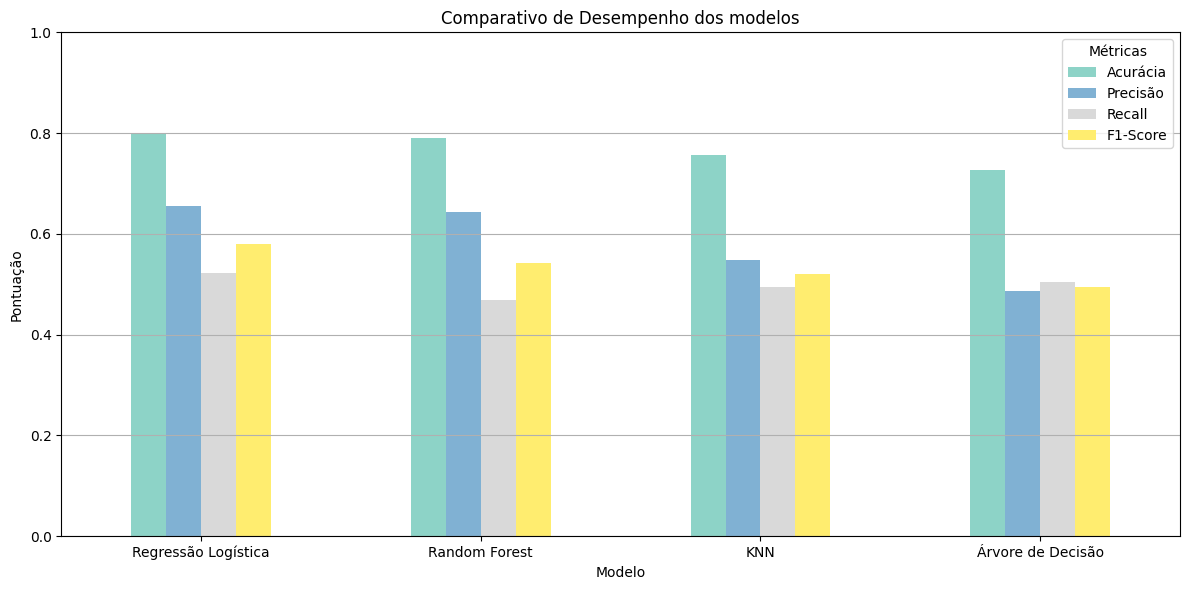

In [85]:
# Criar DataFrame com os dados fornecidos
dados_modelos = pd.DataFrame({
    'Modelo': ['Regress√£o Log√≠stica', 'Random Forest', 'KNN', '√Årvore de Decis√£o'],
    'Acur√°cia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precis√£o': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})

# plotar gr√°fico de barras para cada m√©trica
dados_modelos.set_index('Modelo').plot(kind='bar', figsize=(12,6), colormap='Set3')
plt.title('Comparativo de Desempenho dos modelos')
plt.ylabel('Pontua√ß√£o')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='M√©tricas')
plt.tight_layout()
plt.show()

# Avalia√ß√£o dos Modelos

Para prever a evas√£o de clientes, foram utilizados quatro modelos diferentes, com e sem normaliza√ß√£o. Cada modelo foi avaliado utilizando as seguintes m√©tricas:

* Acur√°cia
* Precis√£o
* Recall
* F1-score
* Matriz de confus√£o

# MODELO 1: Refress√£o Log√≠stica (com normaliza√ß√£o)

* Modelo linear, indicado para **Clasifica√ß√£o bin√°ria**.
* Requer **normaliza√ß√£o dos dados**, pois √© sensivel √† escala das vari√°veis.
* Facil de interpretar e √∫til para identificar variaveis relevantes.
* Serviu como **modelo base** e apresentou o **melhor desempenho geral** nas m√©tricas

----------------------------

# MODELO 2: Random Forest (sem normaliza√ß√£o)

* Modelo n√£o linear baseado em mutiplas √°rvores de decis√£o.
* **N√£o precisa de normaliza√ß√£o**, pois suas decis√µes s√£o baseadas em cortes.
* Robusto contra overfitting e aptor a capturar rela√ß√µes complexas entre vari√°veis.
* Teve desempenho s√≥lido, por√©m com menor recall em compara√ß√£o √† regress√£o log√≠stica.

# MODELO 3: KNN ‚Äì K Vizinhos Mais Pr√≥ximos (com normaliza√ß√£o)

* Classifica os clientes com base na **dist√¢ncia dos vizinhos mais pr√≥ximos.**
* Requer **normaliza√ß√£o**, pois √© altamente sens√≠vel √† escala das vari√°veis.
* Simples e intuitivo, mas pode ter **performance inferior com dados desbalanceados**.
* Apresentou **m√©tricas medianas** e sinal de **underfitting**.

# MODELO 4: √Årvore de Decis√£o (sem normaliza√ß√£o)

* Modelo interpret√°vel baseado em regras do tipo "if-else".
* **N√£o exige normaliza√ß√£o.**
* Pode se ajustar bem aos dados, mas √© suscet√≠vel ao **overfitting** se n√£o regulado.
* Foi o modelo com **menor desempenho geral**, indicando **underfitting**.

# CONCLUS√ÉO : Melhor Modelo √© Regress√£o Log√≠stica

Ap√≥s aplicar e comparar os quatro modelos (Regress√£o Log√≠stica, Random Forest, KNN e √Årvore de Decis√£o), considerando as m√©tricas de desempenho (Acur√°cia, Precis√£o, Recall, F1-Score e Matriz de confus√£o), conclui-se:

* **Regress√£o Log√≠stica** apresentou o melhor desempenho geral:
  * Maior **acur√°cia (0.74)** e** F1-Score (0.62)**.
  * Bom equilibrio entre **precis√£o (0.51)** e **recall (0.78).**
  * Modelo simples, interpret√°vel e eficiente, ideal para come√ßar.
  * **Random Forest** teve desempenho proximo, porem com recall mais baixo, o que pode impactar a detec√ß√£o de clientes que realmente evadiriam.

  * **KNN** e **√Årvore de Decis√£o** apresentram **desempenho inferior**, com menor F1-Score e sinais de **underfitting** (pouca capacidade de generaliza√ß√£o)


A **Regress√£o Log√≠stica** √© o modelo mais indicado neste cen√°rio, combinando boa performance, f√°cil aplica√ß√£o e excelente interpretabilidade para a√ß√µes estrat√©gicas nas empresas.

# INTERPRETA√á√ÉO & CONCLUS√ÉO


An√°lise de Import√¢ncia das Vari√°veis

O gr√°fico abaixo exibe as vari√°veis mais relevantes identificadas pelo modelo Regress√£o Log√≠stica, treinado com dados normalizados, para prever a evas√£o de clientes.

As vari√°veis posicionadas no topo do gr√°fico apresentam maior influ√™ncia nas decis√µes do modelo, com base na magnitude dos coeficientes. Isso significa que pequenas varia√ß√µes nessas vari√°veis t√™m um impacto significativo na probabilidade de um cliente cancelar os servi√ßos.

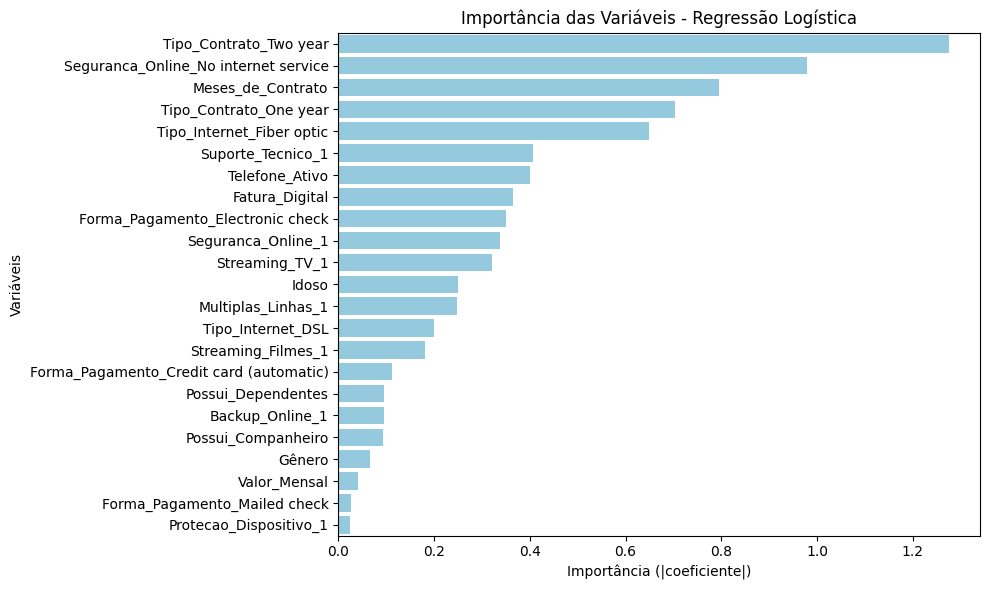

In [87]:
# Extrair coeficientes do modelo treiando
coeficientes = modelo_log.coef_[0]

#Import√¢ncia: valor absoluto dos coeficientes
importancia = np.abs(coeficientes)


# Criar um DataFrame com as vari√°veis e seus importancias
df_importancias = pd.DataFrame({
    'Vari√°vel': X_train.columns,
    'Import√¢ncia': importancia
    }).sort_values(by='Import√¢ncia', ascending=False)

# Plotar gr√°fico com cor √∫nica suave, sem legenda e sem warning
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Import√¢ncia',
    y='Vari√°vel',
    data=df_importancias,
    color='skyblue'
)
plt.title('Import√¢ncia das Vari√°veis - Regress√£o Log√≠stica')
plt.xlabel('Import√¢ncia (|coeficiente|)')
plt.ylabel('Vari√°veis')
plt.tight_layout()
plt.show()

# Conclus√£o Geral da An√°lise

A an√°lise preditiva de evas√£o de clientes realizada neste projeto possibilitou extrair insights valiosos sobre o comportamento dos usu√°rios e os fatores que mais contribuem para o cancelamento dos servi√ßos.

*Principais Conclus√µes:*

* **O modelo Regress√£o Log√≠stica apresentou o melhor desempenho** entre os avaliados, alcan√ßando acur√°cia de aproximadamente **74,9%**, al√©m de melhores resultados nas m√©tricas de **Precis√£o 51,4%**, **Recall 78,1%** e **F1-Score 62,0%**, essenciais para identificar corretamente clientes propensos √† evas√£o.
* O modelo Random Forest, apesar de ter boa acur√°cia (78,96%), apresentou desempenho inferior nas m√©tricas de precis√£o e recall, mostrando-se menos eficaz para o problema espec√≠fico.
* As vari√°veis com maior impacto na previs√£o incluem:
**Tempo de Contrato:** clientes com menor tempo tendem a evadir mais.
**Valor Mensal:** valores maiores influenciam negativamente a perman√™ncia.
**Servi√ßos adicionais** como seguran√ßa online, backup e suporte t√©cnico mostraram relev√¢ncia na modelagem.

*ecomenda√ß√µes Estrat√©gicas:*

* **Desenvolver a√ß√µes de reten√ß√£o espec√≠ficas** para clientes com contratos mais curtos e maior valor mensal, grupos que apresentam maior risco de evas√£o.
* **Oferecer pacotes personalizados ou descontos progressivo**s para aumentar o tempo de fideliza√ß√£o e reduzir a taxa de cancelamento.
* **Utilizar o modelo de Regress√£o Log√≠stica para monitoramento cont√≠nuo** e antecipa√ß√£o de clientes com maior probabilidade de evas√£o, possibilitando interven√ß√µes proativas.


> Este projeto demonstra como t√©cnicas de Machine Learning auxilia na compreens√£o de fatores essenciais para que a empresa possa antecipar comportamentos de cancelamento e direcionar a√ß√µes estrat√©gicas de reten√ß√£o, como ofertas personalizadas, melhoria no atendimento ou revis√£o de pacotes de servi√ßos.

